# 理想方波的傅里叶级数

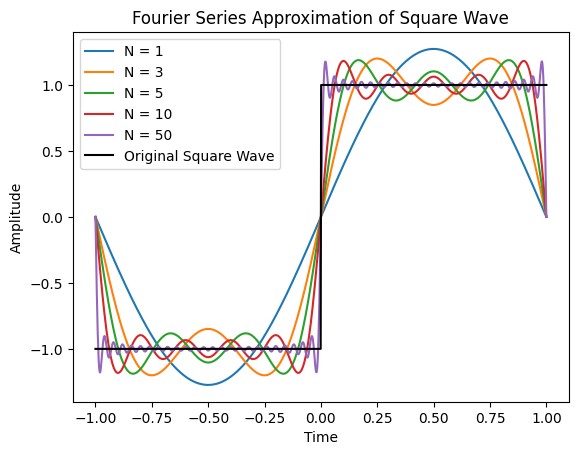

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义方波函数
def square_wave(t, T, amplitude=1):
    return amplitude * np.sign(np.sin(2 * np.pi * t / T))

# 设置方波周期和时间范围
T = 2
t = np.linspace(-T/2, T/2, 1000)

# 计算方波的傅里叶级数系数
def fourier_series_coefficients(T, n_max):
    coefficients = []
    for n in range(1, n_max + 1):
        if n % 2 == 1:
            coefficients.append(4 / (n * np.pi))
        else:
            coefficients.append(0)
    return coefficients

# 计算傅里叶级数的部分和
def fourier_series_sum(t, T, coefficients, n_max):
    series_sum = np.zeros_like(t)
    for n in range(1, n_max + 1):
        series_sum += coefficients[n - 1] * np.sin(2 * np.pi * n * t / T)
    return series_sum

# 不同项数的傅里叶级数部分
n_max_values = [1, 3, 5, 10, 50]
for n_max in n_max_values:
    coefficients = fourier_series_coefficients(T, n_max)
    series_sum = fourier_series_sum(t, T, coefficients, n_max)

    plt.plot(t, series_sum, label=f'N = {n_max}')

plt.plot(t, square_wave(t, T), 'k', label='Original Square Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Fourier Series Approximation of Square Wave')
plt.legend()
plt.show()

# 弦波的傅里叶转化

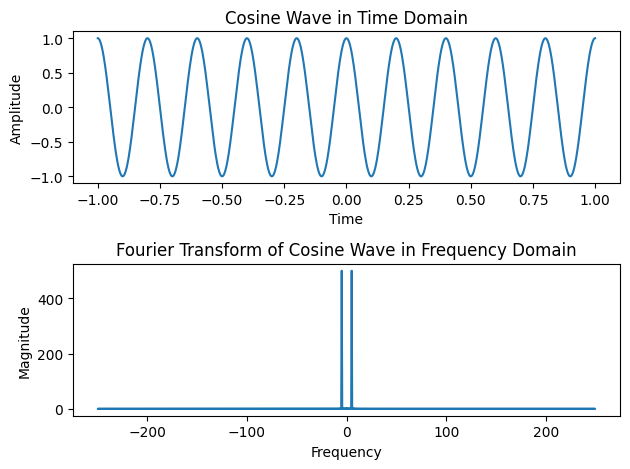

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义弦波函数
def cos_wave(t, A, f):
    return A * np.cos(2 * np.pi * f * t)

# 弦波的参数
A = 1  # 振幅
f = 5  # 频率
t = np.linspace(-1, 1, 1000)  # 时间范围

# 生成弦波信号
cos_wave_signal = cos_wave(t, A, f)

# 计算傅里叶变换
fourier_transform = np.fft.fft(cos_wave_signal)

# 计算频率轴
frequencies = np.fft.fftfreq(len(t), t[1] - t[0])

# 时间域的弦波信号
plt.subplot(2, 1, 1)
plt.plot(t, cos_wave_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Cosine Wave in Time Domain')

# 频率域的傅里叶变换结果（取绝对值）
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fourier_transform))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Cosine Wave in Frequency Domain')
plt.tight_layout()
plt.show()

# 理想脉冲波的傅里叶转换

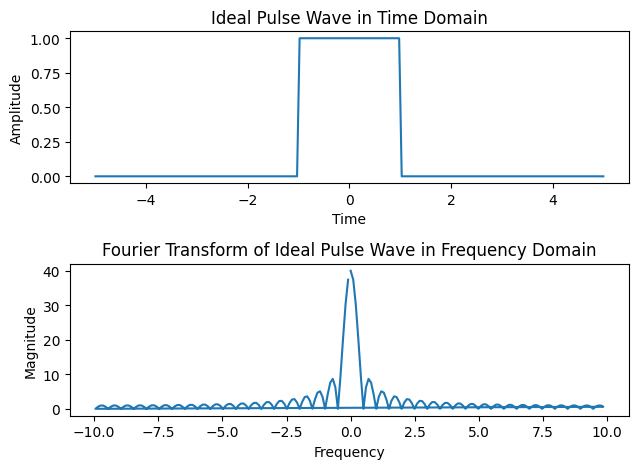

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 定义理想脉冲波函数
def ideal_pulse(t, A, T):
    return np.where((t >= -T/2) & (t <= T/2), A, 0)

# 理想脉冲波的参数
A = 1  # 振幅
T = 2  # 脉冲宽度
t = np.linspace(-5, 5, 200)  # 时间范围

# 生成理想脉冲波信号
ideal_pulse_signal = ideal_pulse(t, A, T)

fourier_transform = np.fft.fft(ideal_pulse_signal)

# 计算频率轴
frequencies = np.fft.fftfreq(len(t), t[1] - t[0])

# 时间域的理想脉冲波信号
plt.subplot(2, 1, 1)
plt.plot(t, ideal_pulse_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Ideal Pulse Wave in Time Domain')

# 频率域的傅里叶变换结果（取绝对值）
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fourier_transform))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Ideal Pulse Wave in Frequency Domain')
plt.tight_layout()
plt.show()

# 高斯函数的傅里叶变换

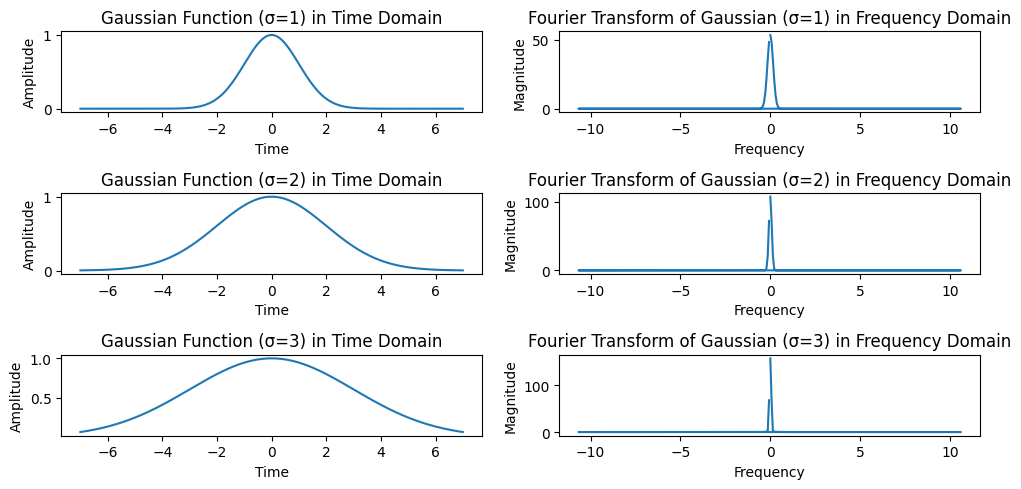

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义高斯函数
def gaussian_function(t, sigma):
    return np.exp(-t ** 2 / (2 * sigma ** 2))

# 高斯函数的标准差参数
sigma_values = [1, 2, 3]

# 生成时间轴
t = np.linspace(-7, 7, 300)

fig, axs = plt.subplots(len(sigma_values), 2, figsize=(10, 5))

# 对不同标准差的高斯函数进行处理
for i, sigma in enumerate(sigma_values):
    # 生成高斯函数信号
    gaussian_signal = gaussian_function(t, sigma)

    # 计算傅里叶变换
    fourier_transform = np.fft.fft(gaussian_signal)

    # 计算频率轴
    frequencies = np.fft.fftfreq(len(t), t[1] - t[0])

    # 时间域的高斯函数
    axs[i, 0].plot(t, gaussian_signal)
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel('Amplitude')
    axs[i, 0].set_title(f'Gaussian Function (σ={sigma}) in Time Domain')

    # 频率域的傅里叶变换结果（取绝对值）
    axs[i, 1].plot(frequencies, np.abs(fourier_transform))
    axs[i, 1].set_xlabel('Frequency')
    axs[i, 1].set_ylabel('Magnitude')
    axs[i, 1].set_title(f'Fourier Transform of Gaussian (σ={sigma}) in Frequency Domain')

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()

# 离散信号的傅里叶变换与逆变换

In [5]:
import numpy as np

# 定义离散数字信号
x = np.array([1, 2, 3, 4])

# 计算离散傅里叶变换（DFT）
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

# 计算离散傅里叶逆变换（IDFT）
def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N) / N
    return x

# 计算DFT
X = dft(x)
print("离散傅里叶变换（DFT）结果：", X)

# 计算IDFT
x_hat = idft(X)
print("离散傅里叶逆变换（IDFT）结果：", x_hat)

# 验证逆变换结果与原信号是否一致（精确到小数点后两位）
if np.allclose(x, np.real(x_hat), atol=1e-2):
    print("逆变换结果与原离散信号序列一致（精确到小数点后两位）。")
else:
    print("逆变换结果与原离散信号序列不一致（精确到小数点后两位）。")

离散傅里叶变换（DFT）结果： [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
离散傅里叶逆变换（IDFT）结果： [1.-5.55111512e-16j 2.-2.77555756e-16j 3.-1.11022302e-16j
 4.+2.77555756e-16j]
逆变换结果与原离散信号序列一致（精确到小数点后两位）。
